# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [114]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
# https://pypi.org/project/citipy/ (pip install citipy)

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [115]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [116]:
#OpenWeather Key
api_key = weather_api_key
units = "imperial"
# #Starting Url for Weather Map.
# url = "http://api.openweathermap.org/data/2.5/weather?"
# query_url = f"{url}appid={api_key}&units={units}&q="
# #need {cities} at end of query to return city json info.
# # response = requests.get(query_url).json()
# # pprint(response, depth=2)
# print(query_url)

query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=8b12adb4095f65c801ada39635129624&units=imperial&q=


In [117]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | port hardy
Processing Record 3 of Set 1 | tasiilaq
Processing Record 4 of Set 1 | pevek
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | clyde river
Processing Record 7 of Set 1 | luderitz
Processing Record 8 of Set 1 | esperance
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | san patricio
Processing Record 11 of Set 1 | cordoba
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | vila franca do campo
Processing Record 14 of Set 1 | tiznit
City not found. Skipping...
Processing Record 15 of Set 1 | busselton
City not found. Skipping...
Processing Record 16 of Set 1 | baiyin
Processing Record 17 of Set 1 | nikolskoye
Processing Record 18 of Set 1 | klaksvik
City not found. Skipping...
Processing Record 19 of Set 1 | kachiry
Processing Record 20 of Set 1 | francisco sa
Processing Record 21 of Set 1 | tuktoyaktuk
Processing Record 22 of Set 1 | hermanu

Processing Record 37 of Set 4 | dingle
Processing Record 38 of Set 4 | nicoya
City not found. Skipping...
Processing Record 39 of Set 4 | mehamn
Processing Record 40 of Set 4 | yumen
Processing Record 41 of Set 4 | moree
Processing Record 42 of Set 4 | raya
Processing Record 43 of Set 4 | chuy
Processing Record 44 of Set 4 | alvaraes
City not found. Skipping...
Processing Record 45 of Set 4 | qaanaaq
City not found. Skipping...
Processing Record 46 of Set 4 | mirnyy
Processing Record 47 of Set 4 | georgetown
Processing Record 48 of Set 4 | kouroussa
City not found. Skipping...
Processing Record 49 of Set 4 | mtwara
Processing Record 1 of Set 5 | moussoro
Processing Record 2 of Set 5 | minden
Processing Record 3 of Set 5 | asyut
Processing Record 4 of Set 5 | biak
Processing Record 5 of Set 5 | green river
Processing Record 6 of Set 5 | iqaluit
Processing Record 7 of Set 5 | yar-sale
Processing Record 8 of Set 5 | muyezerskiy
Processing Record 9 of Set 5 | westport
Processing Record 10 

Processing Record 20 of Set 8 | nadym
City not found. Skipping...
Processing Record 21 of Set 8 | liverpool
Processing Record 22 of Set 8 | kirby
Processing Record 23 of Set 8 | kano
Processing Record 24 of Set 8 | yenagoa
Processing Record 25 of Set 8 | ust-koksa
Processing Record 26 of Set 8 | anloga
Processing Record 27 of Set 8 | eirunepe
Processing Record 28 of Set 8 | rancho palos verdes
City not found. Skipping...
City not found. Skipping...
Processing Record 29 of Set 8 | kitaibaraki
Processing Record 30 of Set 8 | berlevag
Processing Record 31 of Set 8 | tommot
Processing Record 32 of Set 8 | anito
Processing Record 33 of Set 8 | churapcha
Processing Record 34 of Set 8 | bukama
City not found. Skipping...
City not found. Skipping...
Processing Record 35 of Set 8 | lebu
Processing Record 36 of Set 8 | thompson
Processing Record 37 of Set 8 | zhanakorgan
Processing Record 38 of Set 8 | yorosso
Processing Record 39 of Set 8 | englehart
City not found. Skipping...
City not found. 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [118]:
# create a dictionary for establishing dataframe
weather_dict = {
    "City": city_two,
    "Cloudiness": cloudinesses,
    "Country": countries,
    "Date": dates,
    "Humidity": humidities,
    "Lat": lats,
    "Lng": lngs,
    "Max Temp": max_temps,
    "Wind Speed": wind_speeds
}

In [119]:
# establish dataframe
weather_dataframe = pd.DataFrame(weather_dict)

# show the top of the dataframe
weather_dataframe.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,new norfolk,40,LR,1569628543,94,6.65,-10.59,77.00,6.85
1,port hardy,100,CD,1569628543,56,-7.04,29.76,68.55,1.72
2,tasiilaq,20,GL,1569628544,75,65.61,-37.64,41.00,1.88
3,pevek,100,RU,1569628544,95,69.70,170.27,36.98,20.18
4,ushuaia,40,AR,1569628544,66,-54.81,-68.31,50.00,5.82
5,clyde river,20,NZ,1569628544,43,-45.19,169.32,64.00,5.01
6,luderitz,35,NA,1569628544,24,-26.65,15.16,71.60,1.12
7,esperance,90,AU,1569628544,100,-33.86,121.89,55.40,11.41
8,yellowknife,75,CA,1569628544,69,62.45,-114.38,39.20,16.11
9,san patricio,68,ML,1569628545,57,13.30,-4.90,84.17,11.92


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

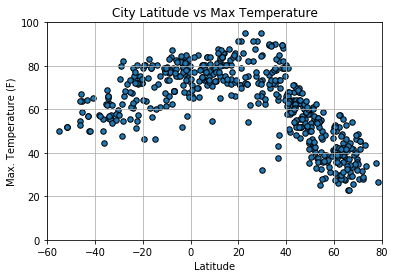

<Figure size 432x288 with 0 Axes>

In [120]:
#Create a Scatter Plot for Lattitude vs Temperature of City
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Max Temp"], marker='o',s=30, edgecolors= "black")
plt.title("City Latitude vs Max Temperature")

plt.ylim(0,100)
plt.xlim(-60, 80)

plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
plt.show()
#save scatter plot chart
plt.savefig("LAT VS TEMP.png")

#### Latitude vs. Humidity Plot

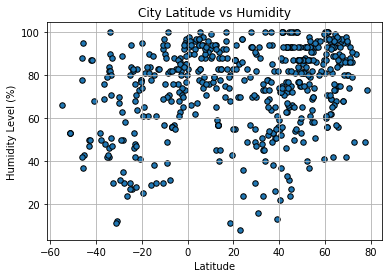

<Figure size 432x288 with 0 Axes>

In [121]:
#create a Scatter Plot for Lattitude vs Humidity
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Humidity"], marker='o', s=30, edgecolors= "black")
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity Level (%)")
plt.xlabel("Latitude")
plt.grid()
plt.show()
#save scatter plot chart
plt.savefig('LAT VS HUM.png')

#### Latitude vs. Cloudiness Plot

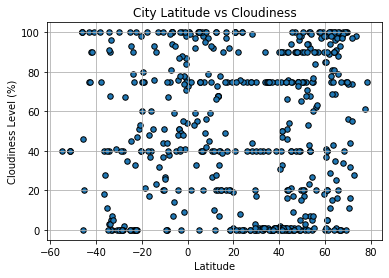

<Figure size 432x288 with 0 Axes>

In [122]:
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Cloudiness"], marker='o', s=30, edgecolors= "black")
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness Level (%)")
plt.xlabel("Latitude")
plt.grid()
plt.show()
#save scatter plot chart
plt.savefig('LAT VS CLOUD.png')

#### Latitude vs. Wind Speed Plot

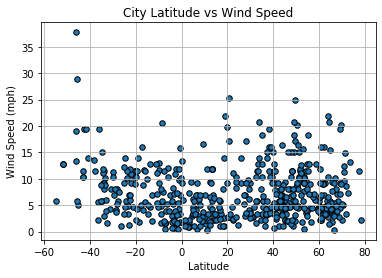

<Figure size 432x288 with 0 Axes>

In [123]:
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Wind Speed"], marker='o', s=30, edgecolors= "black")
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
plt.show()
#save scatter plot chart
plt.savefig('LAT VS WIND.png')

## Linear Regression

In [124]:
# OPTIONAL: Create a function to create Linear Regression plots


In [125]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dataframe.loc[weather_dataframe["Lat"]>0.01]
southern_hemisphere = weather_dataframe.loc[weather_dataframe["Lat"]<-0.01]

# northern_hemisphere.head()
southern_hemisphere.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,port hardy,100,CD,1569628543,56,-7.04,29.76,68.55,1.72
4,ushuaia,40,AR,1569628544,66,-54.81,-68.31,50.00,5.82
5,clyde river,20,NZ,1569628544,43,-45.19,169.32,64.00,5.01
6,luderitz,35,NA,1569628544,24,-26.65,15.16,71.60,1.12
7,esperance,90,AU,1569628544,100,-33.86,121.89,55.40,11.41


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

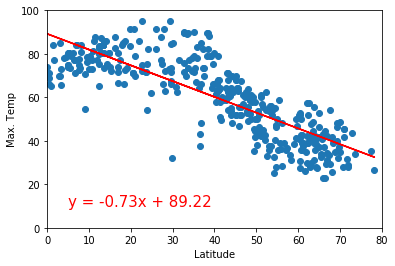

<Figure size 432x288 with 0 Axes>

In [126]:
#Create a Scatter Plot for Lattitude vs Temperature of City
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")

plt.ylim(0,100)
plt.xlim(0, 80)

plt.ylabel("Max. Temp")
plt.xlabel("Latitude")
plt.show()
#save scatter plot chart
plt.savefig("NORTH MAX TEMP VS LAT.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

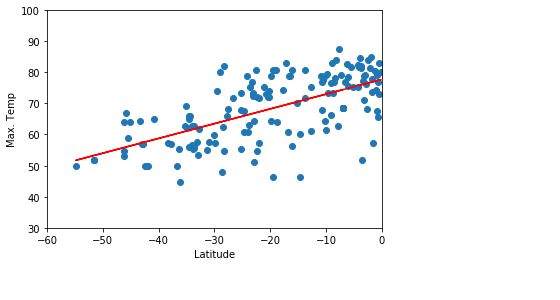

<Figure size 432x288 with 0 Axes>

In [127]:
#Create a Scatter Plot for Lattitude vs Temperature of City (Southern Hemisphere)
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.ylim(30, 100)
plt.xlim(-60, 0, 10)

plt.ylabel("Max. Temp")
plt.xlabel("Latitude")
plt.show()
#save scatter plot chart
plt.savefig("SOUTH MAX TEMP VS LAT.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

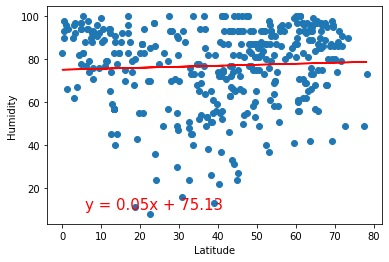

<Figure size 432x288 with 0 Axes>

In [128]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.show()
#save scatter plot chart
plt.savefig("NORTH HUM VS LAT.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

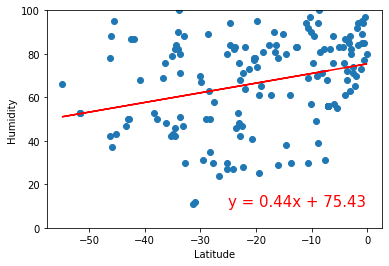

<Figure size 432x288 with 0 Axes>

In [129]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")

plt.ylim(0, 100)

plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.show()
#save scatter plot chart
plt.savefig("SOUTH HUM VS LAT.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

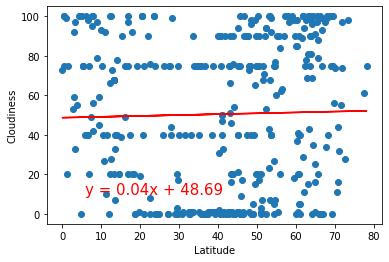

<Figure size 432x288 with 0 Axes>

In [130]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show()
#save scatter plot chart
plt.savefig("NORTH CLOUD VS LAT.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

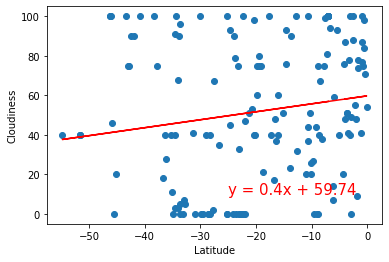

<Figure size 432x288 with 0 Axes>

In [131]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show()
#save scatter plot chart
plt.savefig("SOUTH CLOUD VS LAT.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

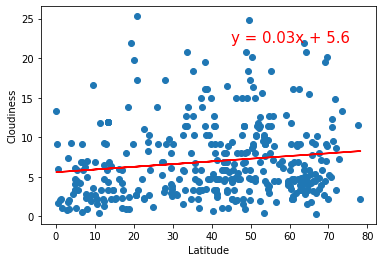

<Figure size 432x288 with 0 Axes>

In [132]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,22),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show()
#save scatter plot chart
plt.savefig("NORTH WIND VS LAT.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

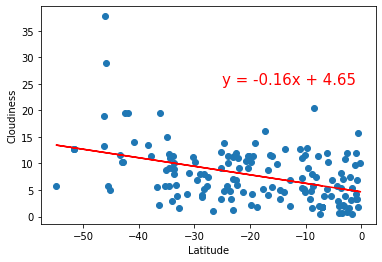

<Figure size 432x288 with 0 Axes>

In [133]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show()
#save scatter plot chart
plt.savefig("SOUTH WIND VS LAT.png")